In [34]:
import pandas as pd

In [35]:
## Data Ingestions step
df=pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [36]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [38]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [39]:
## check for duplicated records
df.duplicated().sum()

1

In [40]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [41]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['age', 'bmi', 'children', 'expenses'], dtype='object')
Categorical Columns: Index(['sex', 'smoker', 'region'], dtype='object')


In [42]:
df[categorical_columns].describe()

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [43]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [44]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [45]:
df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

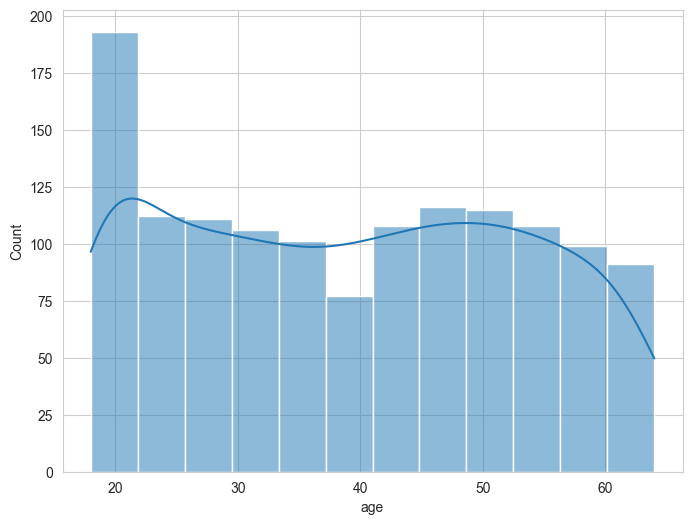

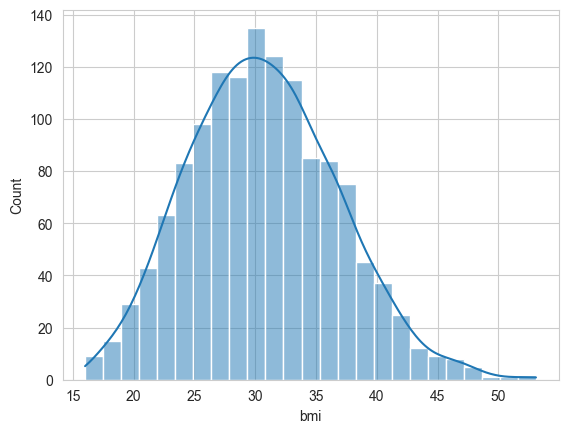

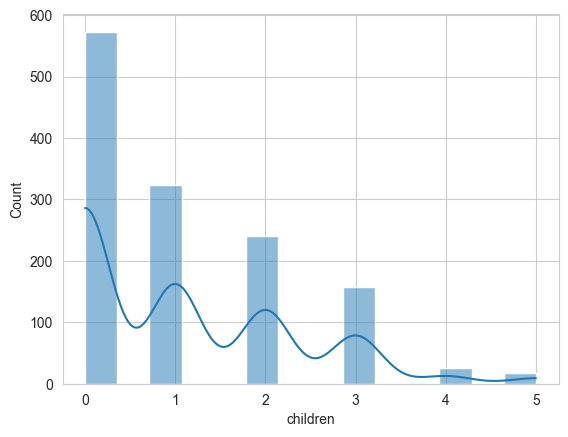

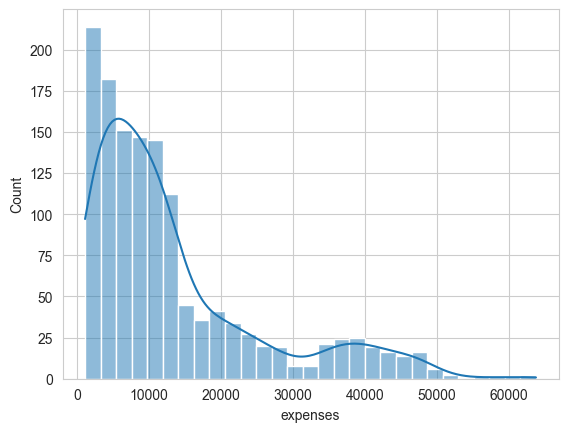

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

C:\Users\mis\AppData\Local\Temp\ipykernel_12584\1081353641.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='children', data=df, ax=axes[1, 0], palette='viridis')
C:\Users\mis\AppData\Local\Temp\ipykernel_12584\1081353641.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=df, ax=axes[1, 1], palette='magma')


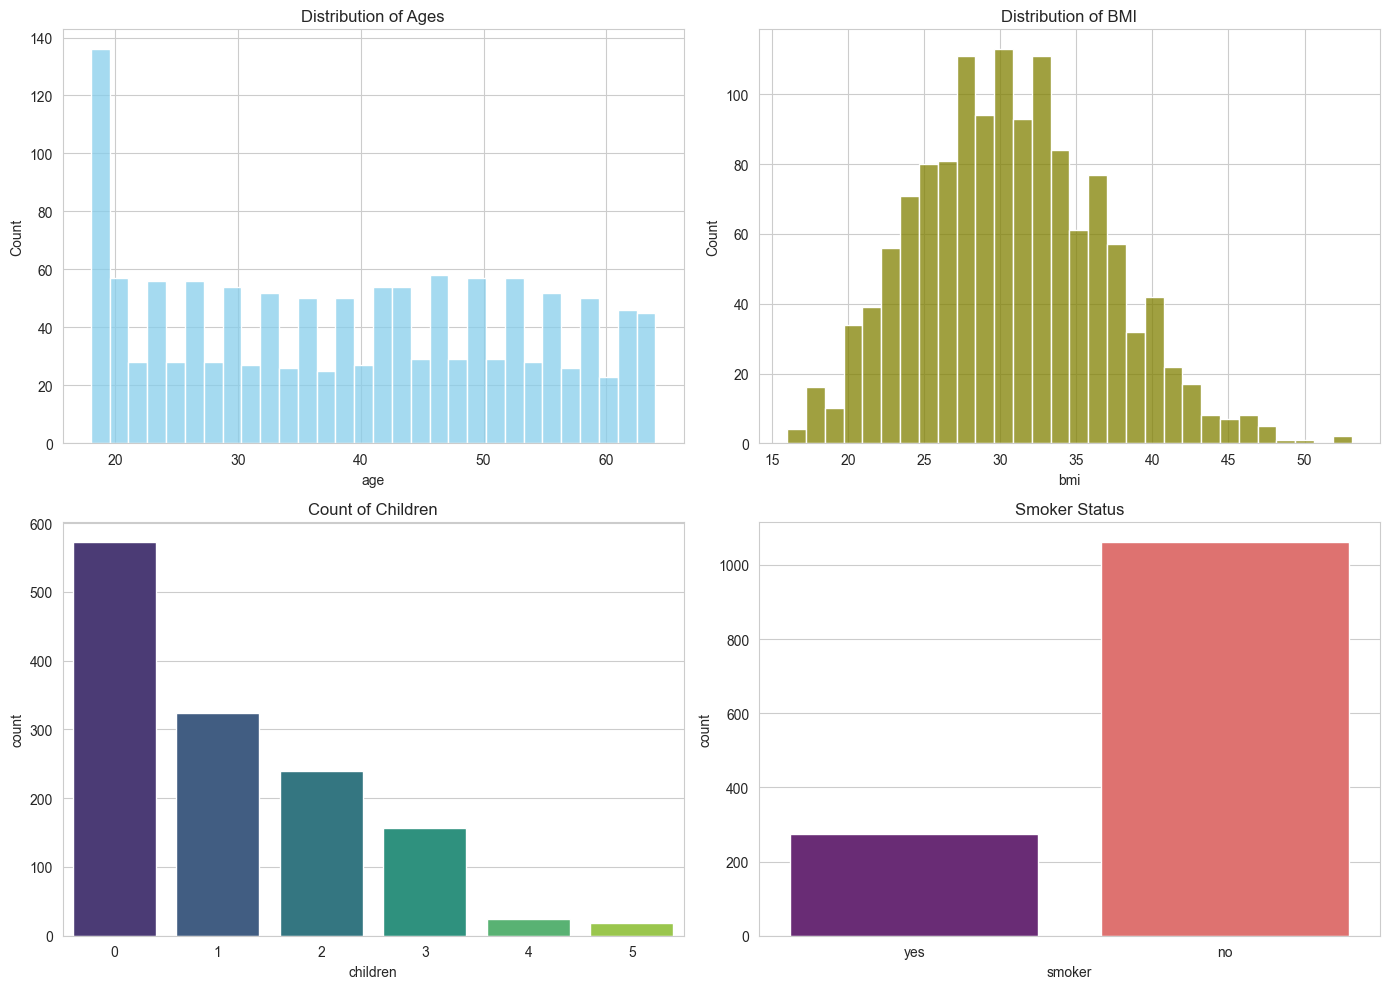

In [47]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Creating a figure to hold multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plotting the distribution of ages
sns.histplot(df['age'], bins=30, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Ages')

# Plotting the distribution of bmi
sns.histplot(df['bmi'], bins=30, ax=axes[0, 1], color='olive')
axes[0, 1].set_title('Distribution of BMI')

# Count plot for the number of children
sns.countplot(x='children', data=df, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Count of Children')

# Count plot for smoker status
sns.countplot(x='smoker', data=df, ax=axes[1, 1], palette='magma')
axes[1, 1].set_title('Smoker Status')

plt.tight_layout()
plt.show()

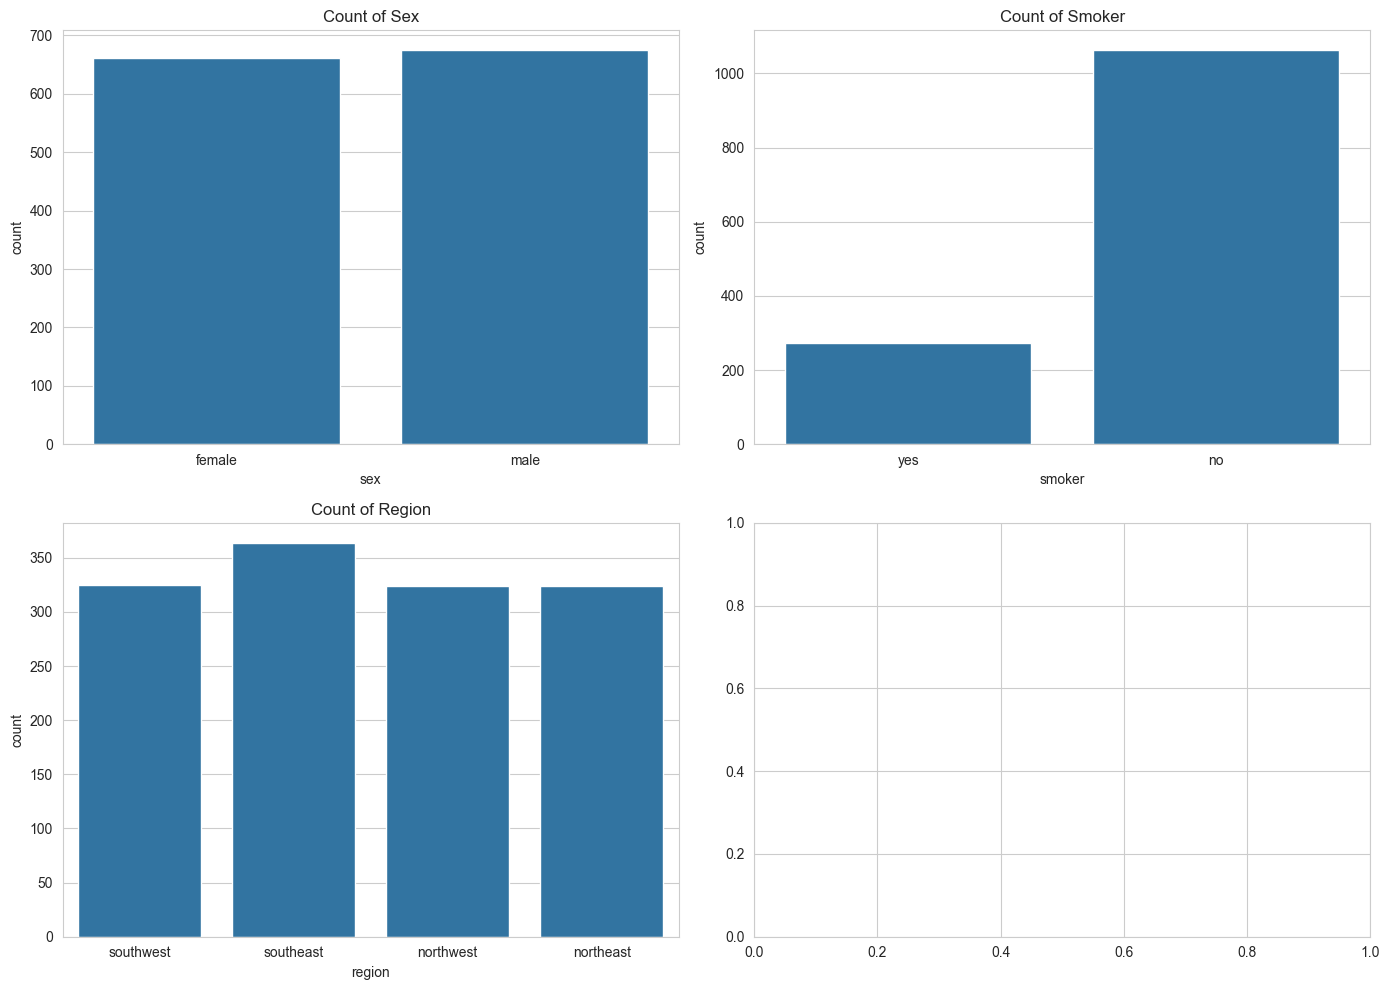

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title('Count of ' + col.capitalize())

plt.tight_layout()
plt.show()

<Axes: >

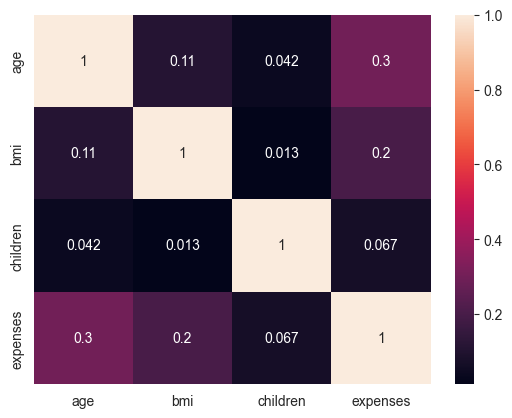

In [49]:
## correlation
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [50]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [51]:
region_map={'southeast':1,'southwest':2,'northwest':3,'northeast':4}

In [52]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [53]:
smoker_map={'no':0,'yes':1}

In [54]:
df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [55]:
sex_map={'male':0,'female':1}

In [56]:
df['region']=df['region'].map(region_map)
df['smoker'] = df['smoker'].map(smoker_map)
df['sex'] = df['sex'].map(sex_map)

In [57]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,2,16884.92
1,18,0,33.8,1,0,1,1725.55
2,28,0,33.0,3,0,1,4449.46
3,33,0,22.7,0,0,3,21984.47
4,32,0,28.9,0,0,3,3866.86
